In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [2]:
#Define the wikipedia url from where we will get the information from Toronto 
url_wikipedia = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
#read the Wikipedia page and check the dataframes received
df_wikipedia = pd.read_html(url_wikipedia, header=0)
#We filter the first dataframe from the received data
df_toronto = df_wikipedia[0]
#Show the first records in the dataframe 
df_toronto.head(10)

,Postal Code,Community,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [3]:
#exclude neighbourhoods with data = 'Not assigned'
df_Toronto_assigned = df_toronto[df_toronto['Community'] != 'Not assigned']
df_Toronto_assigned.head(10)

,Postal Code,Community,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
df_Toronto_assigned.shape

(103, 3)

In [5]:
#Group the dataframe by Postcode and Community  and concatenate all neighborhoods into comma separated list
toronto_neighborhoods = df_Toronto_assigned.groupby(['Postal Code', 'Community'])['Neighbourhood'].apply(list).apply(lambda x: ', '.join(x)).to_frame()
toronto_neighborhoods.reset_index(inplace = True)
toronto_neighborhoods.head(10)

,Postal Code,Community,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [6]:
toronto_neighborhoods.shape

(103, 3)

In [7]:
#start of exercise 2 

In [8]:
# We start with reading the dataset from the provided link 
# Read provided dataset
coords_Toronto_Neighboorhouds = pd.read_csv('http://cocl.us/Geospatial_data')
coords_Toronto_Neighboorhouds.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
#we attach for each postal code in the list the associated latitude and longitude coordenates

toronto_neighborhoods_withcoordenates = pd.merge(toronto_neighborhoods,coords_Toronto_Neighboorhouds, left_on = 'Postal Code', right_on = 'Postal Code')[['Postal Code', 'Community', 'Neighbourhood', 'Latitude', 'Longitude']]
toronto_neighborhoods_withcoordenates.head(10)

,Postal Code,Community,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [10]:
#we verify we don´t have extra records
toronto_neighborhoods_withcoordenates.shape

(103, 5)

In [11]:
# Exercise 3 

In [12]:
#start exploring the map distribution of the existing neighboorhouds
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
# now we build a map using the folium rendering library folium 

import folium 

# create map of To by  using latitude and longitude values in the previous commands
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

#define the dataset we will use to produce the map 

toronto_neighborhoods_withcoordenates

# add markers into the existing maps for each neighboorhood

for lat, lng, Community, Neighbourhood in zip(toronto_neighborhoods_withcoordenates['Latitude'], toronto_neighborhoods_withcoordenates['Longitude'],toronto_neighborhoods_withcoordenates['Community'], toronto_neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, Community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto 

In [14]:
# Define foursquare credentials
CLIENT_ID = 'ZWI5DGH2OFCYKBTUHWTL24X13N422YDOKJVHZAOK13KRBJIQ' # your Foursquare ID
CLIENT_SECRET = 'DQF5RBOTAM5ZNISEUKFDUPKXQ1XJVY4QQHMCEGJ1INDQTUOP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZWI5DGH2OFCYKBTUHWTL24X13N422YDOKJVHZAOK13KRBJIQ
CLIENT_SECRET:DQF5RBOTAM5ZNISEUKFDUPKXQ1XJVY4QQHMCEGJ1INDQTUOP


In [15]:
# defining radius and limit of venues to get
radius=500
LIMIT=100
toronto_neighborhoods_withcoordenates.head()

,Postal Code,Community,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [17]:
toronto_venues = getNearbyVenues(names = toronto_neighborhoods_withcoordenates['Postal Code'],
                                   latitudes = toronto_neighborhoods_withcoordenates['Latitude'],
                                   longitudes = toronto_neighborhoods_withcoordenates['Longitude']
                                  )
toronto_venues.head()

M1B
M1C
M1E
M1G
M1H
M1J
M1K
M1L
M1M
M1N
M1P
M1R
M1S
M1T
M1V
M1W
M1X
M2H
M2J
M2K
M2L
M2M
M2N
M2P
M2R
M3A
M3B
M3C
M3H
M3J
M3K
M3L
M3M
M3N
M4A
M4B
M4C
M4E
M4G
M4H
M4J
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5M
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6A
M6B
M6C
M6E
M6G
M6H
M6J
M6K
M6L
M6M
M6N
M6P
M6R
M6S
M7A
M7R
M7Y
M8V
M8W
M8X
M8Y
M8Z
M9A
M9B
M9C
M9L
M9M
M9N
M9P
M9R
M9V
M9W


,Postal Code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M1B,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,M1C,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,M1E,43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,M1E,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,M1E,43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant


In [18]:
toronto_venues.shape

(2159, 7)

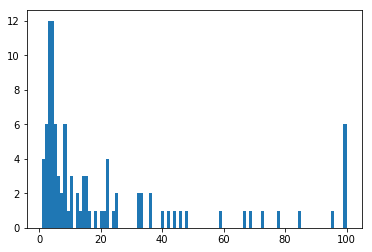

In [19]:
#let´s explore the dataset and it´s distribution in what concern number of venues 
#As we are interested in getting some information to make good clustering, we will try to eliminate the ones with less values
toronto_venues_count = toronto_venues.groupby('Postal Code').count().reset_index()
toronto_venues_count = toronto_venues_count[['Postal Code', 'Venue Category']]
toronto_venues_count.columns = ['Postal Code', 'Venue Category Count']
plt.hist(toronto_venues_count['Venue Category Count'], bins = 100)
plt.show()

In [20]:
# A big bunch of neighbourhoods have very little number of venues, we will consider for our analysis those that have more than 4 venues

Sample_to_cluster = toronto_venues_count.loc[toronto_venues_count['Venue Category Count'] > 4]
Sample_to_cluster

,Postal Code,Venue Category Count
2,M1E,8
4,M1H,9
6,M1K,8
7,M1L,10
10,M1P,7
11,M1R,5
13,M1T,12
15,M1W,14
16,M2H,5
17,M2J,67


In [24]:
# let's display how in a table mode the values are distributed, we consider only the records with at least 5 venues  to make a relevant clustering
Toronto_venues_filtered = toronto_venues[~toronto_venues['Postal Code'].isin(Sample_to_cluster)]
Toronto_venues_filtered.head()
Toronto_venues_filtered.shape

(2159, 7)

In [27]:
#Analize neighbourghoods

# one hot encoding
toronto_onehot = pd.get_dummies(Toronto_venues_filtered[['Venue Category']],
                                prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Postal Code'] = Toronto_venues_filtered['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = ['Postal Code'] + [_ for _ in toronto_onehot.columns if _ !='Postal Code']
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Postal Code,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M1E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M1E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M1E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#We will group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [28]:
toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()
toronto_grouped.head()

,Postal Code,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
toronto_grouped.shape

(99, 271)

In [ ]:
# we write a function to sort the venues in descending order

In [30]:
toronto_grouped

,Postal Code,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,M1C,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,M1E,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,M1G,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,M1H,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
5,M1J,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
6,M1K,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.125,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
7,M1L,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,M1M,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9,M1N,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Postal Code'] = toronto_grouped['Postal Code']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Fast Food Restaurant,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
1,M1C,Bar,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant
2,M1E,Electronics Store,Intersection,Restaurant,Rental Car Location,Bank,Mexican Restaurant,Breakfast Spot,Medical Center,Drugstore,Donut Shop
3,M1G,Coffee Shop,Korean Restaurant,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
4,M1H,Hakka Restaurant,Gas Station,Bakery,Bank,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Fried Chicken Joint,Lounge,Donut Shop


In [70]:
#Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0], dtype=int32)

In [71]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_neighborhoods_withcoordenates

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Postal Code'), on='Postal Code')

toronto_merged

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,Fast Food Restaurant,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4.0,Bar,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Electronics Store,Intersection,Restaurant,Rental Car Location,Bank,Mexican Restaurant,Breakfast Spot,Medical Center,Drugstore,Donut Shop
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Coffee Shop,Korean Restaurant,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Hakka Restaurant,Gas Station,Bakery,Bank,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Fried Chicken Joint,Lounge,Donut Shop
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,Playground,Smoke Shop,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,0.0,Discount Store,Bus Station,Coffee Shop,Hobby Shop,Train Station,Department Store,Chinese Restaurant,Yoga Studio,Dog Run,Dim Sum Restaurant
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Park,Metro Station,Ice Cream Shop,Bus Station,Intersection,Soccer Field,Doner Restaurant,Donut Shop
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,0.0,American Restaurant,Skating Rink,Motel,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,General Entertainment,College Stadium,Café,Skating Rink,Yoga Studio,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


In [72]:
#since some lines can not be clustered due to the fact the values in the venues are not in our top ten venues we drop them from the sample 

toronto_merged = toronto_merged[toronto_merged['Cluster Labels'].notna()]
toronto_merged['Cluster Labels'] = np.int64(toronto_merged['Cluster Labels'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters